##### 1. Write a function to check whether a string is a palindrome. A palindrome is a string that reads the same forwards and backwards.

In [7]:
def is_palindrome(string):
    string_reversed = string[::-1]
    return string == string_reversed

In [8]:
strings = ['aaAaa', 'hannah', 'Hannah', 'Baker']

for string in strings:
    if is_palindrome(string):
        print(f'{string} is palindrome')
    else:
        print(f'{string} is not palindrome')

aaAaa is palindrome
hannah is palindrome
Hannah is not palindrome
Baker is not palindrome


##### 2. Write a function that checks whether a number is prime or not

In [9]:
def is_prime(n):
    is_prime = True
    max_factor = n
    curr_factor = 2
    while curr_factor < max_factor:
        second_factor = n / curr_factor
        is_whole_num = second_factor % 1 == 0
        if is_whole_num:
            is_prime = False
            break
        curr_factor += 1
        max_factor = second_factor
    return is_prime

##### 3. Create a function that takes in 3 parameters (integer n, integer a, integer b), and generates an nxn numpy matrix with random values from the range a to b inclusive.

In [10]:
import numpy as np
import random

def generate_numpy_matrix(n, a, b):
    nxn_list = []
    for x in range(n):
        list_rand_values = [random.randint(a,b) for x in range(n)]
        nxn_list.append(list_rand_values)
    return np.matrix(nxn_list)

In [11]:
print(generate_numpy_matrix(5,5,99))
print(generate_numpy_matrix(5,0,1))

[[25 68 60 20 90]
 [22 49 39 65 18]
 [22 28 97 44 95]
 [60 61 59 33 88]
 [85 42  6 11 28]]
[[1 1 1 1 0]
 [1 1 1 1 0]
 [1 1 1 1 1]
 [1 1 1 0 0]
 [1 0 1 1 1]]


##### 4. Create a 5x5 identity matrix

In [12]:
import numpy as np

identity_matrix_5x5 = np.identity(5)

print(identity_matrix_5x5)

[[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]


##### 5. Create a function that lists the first n prime numbers

In [13]:
def get_first_n_prime_numbers(n):
    prime_numbers = []
    curr_number = 2
    while len(prime_numbers) != n:
        if is_prime(curr_number):
            prime_numbers.append(curr_number)
        curr_number += 1
    return prime_numbers

In [14]:
print(get_first_n_prime_numbers(1))

[2]


6. Load kpop_music_videos.csv as a dataframe and answer the following questions
    - based on the MV dataset, which Kpop group is the most prolific in terms of music video releases?
    - which year had the most releases?
    - in descending order, find the top 5 months that music videos are typically released HINT: get the monthly average and compute from there

In [212]:
import pandas as pd

kpop_vids_df = pd.read_csv('kpop_datasets/kpop_music_videos.csv')
# kpop_vids_df.info()

In [213]:
duplicate_rows = kpop_vids_df[kpop_vids_df.duplicated(keep=False)]
# duplicate_rows

In [214]:
kpop_vids_df = kpop_vids_df.drop_duplicates()
# kpop_vids_df.shape

In [215]:
kpop_group_types = kpop_vids_df['Type'].unique()
# kpop_group_types

In [216]:
not_boy_solo = kpop_vids_df['Type'] != 'Boy Solo'
not_girl_solo = kpop_vids_df['Type'] != 'Girl Solo'
kpop_grps_df = kpop_vids_df[not_boy_solo & not_girl_solo]
# kpop_grps_df

In [217]:
music_vid_count = kpop_grps_df['Artist'].value_counts()
# music_vid_count

In [218]:
most_prolific_grp = music_vid_count.idxmax()
most_prolific_grp

'FTISLAND'

In [409]:
kpop_vids_df['Date'] = kpop_vids_df['Date'].apply(pd.to_datetime)
# kpop_vids_df.info()

In [408]:
release_per_year = kpop_vids_df.groupby(kpop_vids_df['Date'].dt.year)['Release'].count()
# release_per_year.sort_values(ascending=False).head()

In [221]:
most_release_year = release_per_year.idxmax()
most_release_year

2019

In [400]:
kpop_vids_by_month_df = kpop_vids_df.copy(deep=True)
kpop_vids_by_month_df['Year'] = kpop_vids_df['Date'].dt.year
kpop_vids_by_month_df['Month'] = kpop_vids_df['Date'].dt.month
kpop_vids_by_month_df = kpop_vids_by_month_df.groupby(['Month', 'Year']).count().unstack(fill_value=0).stack()
# kpop_vids_by_month_df

In [227]:
top5_most_released_months = kpop_vids_by_month_df.groupby(level=0).mean().sort_values(by='Release', ascending=False).head(5)
top5_most_released_months['Release']

Month
7     12.241379
4     12.103448
11    11.965517
1     11.931034
5     11.620690
Name: Release, dtype: float64

In [228]:
df_v2 = kpop_vids_df.set_index('Date')
df_v2.index = pd.to_datetime(df_v2.index)
monthly = df_v2.resample('M').count()
monthly['Month'] = monthly.index.month
by_month_df = monthly.pivot_table(index=['Month', 'Date'])
# by_month_df

In [229]:
most_release_by_month = by_month_df.groupby(level=0).mean().sort_values(by='Release', ascending=False)
most_release_by_month['Release'].head(5)

Month
7     12.678571
11    12.392857
1     12.357143
4     12.103448
10    11.964286
Name: Release, dtype: float64

9. Load kpop_idols.csv as a dataframe and answer the following questions:
    - within the dataset, who is the oldest kpop idol?
    - which group, using the mean of the members' ages combined, is the oldest?
    - which group, using the mean of the members' ages combined, is the youngest?

In [382]:
import pandas as pd

idols_df = pd.read_csv('kpop_datasets/kpop_idols.csv')
# idols_df.info()

In [383]:
sort_by_age_df = idols_df.sort_values(by='Date of Birth', ascending=True)
sort_by_age_df.head(1)

,Stage Name,Full Name,Korean Name,K. Stage Name,Date of Birth,Group,Country,Birthplace,Other Group,Gender
844,PSY,Park Jaesang,박재상,싸이,1977-12-31,NaN,South Korea,Seoul,NaN,M


In [384]:
now = pd.Timestamp('now')
idols_df['Date of Birth'] = idols_df['Date of Birth'].apply(pd.to_datetime)
idols_df['Age'] = (now - idols_df['Date of Birth']).astype('<m8[Y]')
# idols_df

In [385]:
group_mean_age_df = idols_df.groupby('Group', as_index=False)['Age'].mean()
group_mean_age_sorted_df = group_mean_age_df.sort_values(by='Age', ascending=False)
oldest_group_row = group_mean_age_df.iloc[group_mean_age_df['Age'].idxmax()]

In [386]:
oldest_group_row

Group    Brown Eyed Girls
Age                  38.5
Name: 45, dtype: object

In [387]:
youngest_group_row = group_mean_age_df.iloc[group_mean_age_df['Age'].idxmin()]
youngest_group_row

Group    TEEN TEEN
Age      17.666667
Name: 171, dtype: object

8. Using the kpop_idols.csv and kpop_music_videos.csv datasets, answer the following:
    - identify your favorite kpop group
    - what is the average age of the members, and show who the eldest and youngest members are
    - using Pandas, show a histogram/barplot of the number of music video releases they have per year

In [388]:
favorite_kpop_group = 'Mamamoo'

In [389]:
kpop_grp_members = idols_df[idols_df['Group'] == favorite_kpop_group]
kpop_grp_members

,Stage Name,Full Name,Korean Name,K. Stage Name,Date of Birth,Group,Country,Birthplace,Other Group,Gender,Age
364,Hwasa,Ahn Hyejin,안혜진,화사,1995-07-23,Mamamoo,South Korea,Jeonju,NaN,F,26.0
802,Moonbyul,Moon Byulyi,문별이,문별,1992-12-22,Mamamoo,South Korea,Bucheon,NaN,F,29.0
991,Solar,Kim Yongsun,김용선,솔라,1991-02-21,Mamamoo,South Korea,Seoul,NaN,F,31.0
1122,Wheein,Jung Wheein,정휘인,휘인,1995-04-17,Mamamoo,South Korea,Jeonju,NaN,F,26.0


In [390]:
kpop_grp_ave_age = kpop_grp_members['Age'].mean()
kpop_grp_ave_age 

28.0

In [391]:
grp_members_by_age = kpop_grp_members.sort_values(by='Date of Birth', ascending=False)
grp_members_by_age

,Stage Name,Full Name,Korean Name,K. Stage Name,Date of Birth,Group,Country,Birthplace,Other Group,Gender,Age
364,Hwasa,Ahn Hyejin,안혜진,화사,1995-07-23,Mamamoo,South Korea,Jeonju,NaN,F,26.0
1122,Wheein,Jung Wheein,정휘인,휘인,1995-04-17,Mamamoo,South Korea,Jeonju,NaN,F,26.0
802,Moonbyul,Moon Byulyi,문별이,문별,1992-12-22,Mamamoo,South Korea,Bucheon,NaN,F,29.0
991,Solar,Kim Yongsun,김용선,솔라,1991-02-21,Mamamoo,South Korea,Seoul,NaN,F,31.0


In [392]:
youngest_member = grp_members_by_age.head(1)
youngest_member

,Stage Name,Full Name,Korean Name,K. Stage Name,Date of Birth,Group,Country,Birthplace,Other Group,Gender,Age
364,Hwasa,Ahn Hyejin,안혜진,화사,1995-07-23,Mamamoo,South Korea,Jeonju,NaN,F,26.0


In [393]:
eldest_member = grp_members_by_age.tail(1)
eldest_member

,Stage Name,Full Name,Korean Name,K. Stage Name,Date of Birth,Group,Country,Birthplace,Other Group,Gender,Age
991,Solar,Kim Yongsun,김용선,솔라,1991-02-21,Mamamoo,South Korea,Seoul,NaN,F,31.0


In [394]:
fav_kpop_vids = kpop_vids_df[kpop_vids_df['Artist'] == favorite_kpop_group].copy(deep=True)
# fav_kpop_vids

In [395]:
fav_kpop_vids['Year'] = fav_kpop_vids['Date'].dt.year
# fav_kpop_vids

In [396]:
music_vid_per_year = fav_kpop_vids.groupby('Year', as_index=False).count()
music_vid_per_year

,Year,Date,Artist,Song Name,Korean Name,Director,Video,Type,Release
0,2014,2,2,2,2,2,2,2,2
1,2015,4,4,4,4,1,4,4,4
2,2016,10,10,10,8,2,10,10,10
3,2017,3,3,3,3,2,3,3,3
4,2018,7,7,7,6,0,7,7,7
5,2019,4,4,4,2,0,4,4,4
6,2020,1,1,1,0,0,1,1,1


<AxesSubplot:xlabel='Year'>

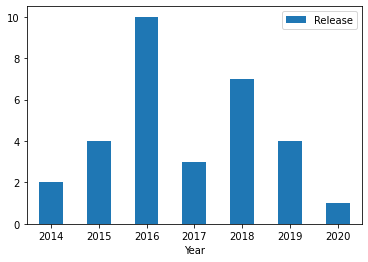

In [397]:
music_vid_per_year_bar_plt = music_vid_per_year.plot.bar(x='Year', y='Release', rot=0)
music_vid_per_year_bar_plt

array([[<AxesSubplot:title={'center':'Year'}>]], dtype=object)

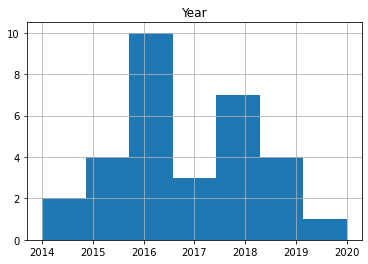

In [398]:
music_vid_per_year_hist_plt = fav_kpop_vids.hist(column='Year', bins=7)
music_vid_per_year_hist_plt